# Importing libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Loading and Preprocessing the dataset

In [99]:
# Load Iris Dataset
iris = load_iris()
data_points = iris.data
labels = iris.target
unique_labels = np.unique(labels)

In [100]:
print("Data Points shape:")
print(data_points.shape)

print("\nLabels shape:")
print(labels.shape)

print("\nUnique Labels:")
print(unique_labels)

Data Points shape:
(150, 4)

Labels shape:
(150,)

Unique Labels:
[0 1 2]


# Phase 1

### Calculate Covariance Matrix from scratch

In [101]:
def calculate_covariance_matrix(centered_data):
    num_samples = centered_data.shape[0]
    return np.dot(centered_data.T, centered_data) / (num_samples)

### Calculate Eigenvalues and Eigenvectors from scratch

In [102]:
def power_iteration(A, num_iterations):
    n = A.shape[0]
    # Random initialization of a vector
    V = np.random.rand(n)

    for _ in range(num_iterations):
        # Perform matrix-vector multiplication
        AV = A.dot(V)
        
        # Normalize the vector
        eigenvalue = np.linalg.norm(AV)
        V = AV / eigenvalue

    return eigenvalue, V

def calculate_eigenvalues_eigenvectors(covariance_matrix, num_iterations):
    n = covariance_matrix.shape[0]
    
    # Initialize eigenvectors matrix
    eigenvectors = np.eye(n)
    eigenvalues = []
    
    for i in range(n):
        eigenvalue, eigenvector = power_iteration(covariance_matrix, num_iterations)
        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = eigenvector 
    
        # Deflate the matrix
        covariance_matrix -= eigenvalue * np.outer(eigenvector, eigenvector)  
    
    return np.array(eigenvalues),eigenvectors

## PCA from scratch

In [103]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, data):
        # Center the data by subtracting the mean
        self.mean = np.mean(data, axis=0)
        centered_data = data - self.mean

        # Calculate the covariance matrix
        cov_matrix = calculate_covariance_matrix(centered_data)

        # Compute the eigenvalues and eigenvectors (Built-In)
        # eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Compute the eigenvalues and eigenvectors (From Scratch)
        eigenvalues, eigenvectors = calculate_eigenvalues_eigenvectors(cov_matrix, 1000)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]  # This line calculates the indices that would sort the eigenvalues in ascending order and then reverses the order
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.q_matrix = self.eigenvectors[:, :self.n_components]

    def compress(self, data):
        centered_data = data - self.mean
        compressed_data = np.dot(centered_data, self.q_matrix)
        return compressed_data

    def decompress(self, compressed_data):
        decompressed_data = np.dot(compressed_data, self.q_matrix.T) + self.mean
        return decompressed_data

### Applying PCA on the dataset

In [104]:
# Specify a range of n_components values to test
n_components_values = [1, 2, 3, 4]

# Initialize a list to store results
results = []

# Initialize an empty list to store MSE values
mse_values = []

for n_components in n_components_values:
    # Apply PCA using the custom implementation
    custom_pca = MyPCA(n_components)
    custom_pca.fit(data_points)
    compressed_data = custom_pca.compress(data_points)
    decompressed_data = custom_pca.decompress(compressed_data)

    # Calculate Mean Squared Error
    mse = mean_squared_error(data_points, decompressed_data)

    # Append results to the list
    results.append([n_components, mse])

    # Append MSE to the list for plotting
    mse_values.append(mse)

    # Display original data and its transformed version
    print(f"\nOriginal Data (Shape: {data_points.shape})")
    print(tabulate(data_points[:5], headers="keys", tablefmt="pretty"))  # Display first 5 rows of original data
    print(f"\nTransformed Data with {n_components} components (Shape: {decompressed_data.shape})")
    print(tabulate(decompressed_data[:5], headers="keys", tablefmt="pretty"))  # Display first 5 rows of transformed data


Original Data (Shape: (150, 4))
+-----+-----+-----+-----+
|  0  |  1  |  2  |  3  |
+-----+-----+-----+-----+
| 5.1 | 3.5 | 1.4 | 0.2 |
| 4.9 | 3.0 | 1.4 | 0.2 |
| 4.7 | 3.2 | 1.3 | 0.2 |
| 4.6 | 3.1 | 1.5 | 0.2 |
| 5.0 | 3.6 | 1.4 | 0.2 |
+-----+-----+-----+-----+

Transformed Data with 1 components (Shape: (150, 4))
+-------------------+--------------------+--------------------+---------------------+
|         0         |         1          |         2          |          3          |
+-------------------+--------------------+--------------------+---------------------+
| 4.873326321440436 | 3.284202379305414  | 1.4585884735551988 | 0.2376401177508055  |
| 4.862478919339449 | 3.2867394122709013 | 1.4328745961118643 | 0.22688568723709512 |
| 4.799290877880924 | 3.301518079339055  | 1.2830866986206155 | 0.16423922176667727 |
| 4.851203235450775 | 3.2893766134613487 | 1.4061454723176254 | 0.21570664567982822 |
| 4.857211764239518 | 3.287971315172486  | 1.4203887511644977 | 0.22166367619

### **Elbow Method:** 
Plot the MSE values against the number of components to identify the point where the rate of MSE improvement starts to diminish, often referred to as the "elbow point." This helps in determining an optimal number of components.

In [105]:
# Print the results in a table
print("\nResults:")
print(tabulate(results, headers=["Number of Components", "Mean Squared Error"], tablefmt="grid"))


Results:
+------------------------+----------------------+
|   Number of Components |   Mean Squared Error |
+========================+======================+
|                      1 |          0.0856043   |
+------------------------+----------------------+
|                      2 |          0.0253411   |
+------------------------+----------------------+
|                      3 |          0.00591905  |
+------------------------+----------------------+
|                      4 |          5.64403e-29 |
+------------------------+----------------------+


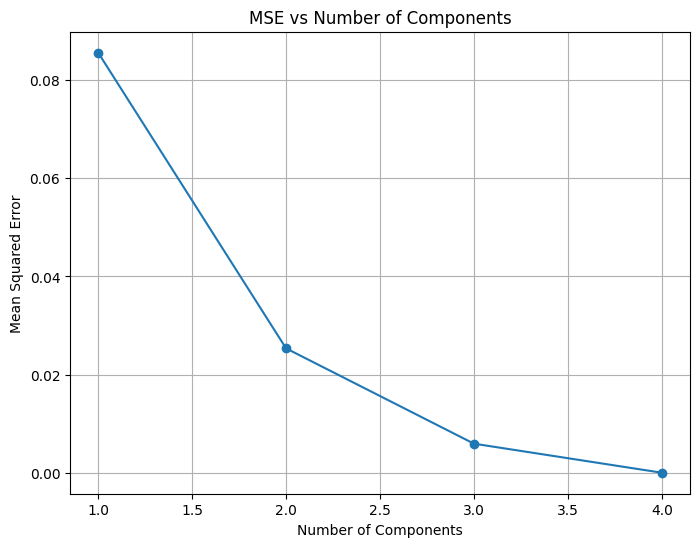

In [106]:
# Plotting the MSE values against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components_values, mse_values, marker='o')
plt.title('MSE vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### Discussion of Findings:

1.  **Trade-offs between the number of components and the quality of representation:**
    
    *   As the number of components increases, the Mean Squared Error (MSE) decreases. This decrease in MSE suggests a better reconstruction of the original data from the compressed representation.
    *   Lower dimensions (fewer components) reduce computational complexity but may lead to a loss of important information, as seen from the increasing MSE.
2.  **Lower dimensions might reduce computational complexity but could lose important information:**
    
    *   With fewer components (lower dimensions), the MSE is higher, indicating that the compressed representation doesn't fully capture the complexity of the original data. This loss in information might impact downstream tasks that rely on the detailed information present in the data.

### Recommendation:

Based on the MSE comparison and the Elbow Method graph:

*   **Number of components that provides a good balance:**
    *   If reducing complexity is important and the difference in MSE is not significant, we might choose the model with 2 components. On the other hand, if accuracy is a top priority and the computational cost is acceptable, we might choose the model with 3 components.
    
    *   So, we might choose 2 or 3.


# Phase 2 

## Needed Functions 

### function to print the Classes and outliers results in tabulate format

In [107]:
def print_clusters(clusters, outliers):
    def print_cluster_info(clusters):
        print("Final Clusters:")
        if clusters:
            for i, cluster in enumerate(clusters):
                print(f"Cluster {i + 1}:")
                table = tabulate(cluster, headers=[f'Column {j}' for j in range(len(cluster[0]))], tablefmt='grid')
                print(table)
                print()
        else:
            print("No clusters found.")

    def print_outliers_info(outliers):
        print("Outliers:")
        if outliers:
            table = tabulate(outliers, headers=[f'Column {j}' for j in range(len(outliers[0]))], tablefmt='grid')
            print(table)
        else:
            print("No outliers found.")
    
    print_cluster_info(clusters)
    print_outliers_info(outliers)

### Function to print the confusion matrix to check if the result is as the actual labels of not :

In [108]:
def plot_confusion_matrix(clusters, labels):
    cluster_labels = np.concatenate([np.full(len(cluster), i) if len(cluster) > 0 else [] for i, cluster in enumerate(clusters)])

    # Create confusion matrix
    cm = confusion_matrix(labels, cluster_labels)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

### Function to Plot clusters and outliers in 3D

In [109]:
def plot_clusters(clusters, outliers=None, dimension='3D'):
    if dimension == '3D':
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for i, cluster in enumerate(clusters):
            cluster_data = np.array(cluster)
            ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {i + 1}')

        if outliers:
            outliers_data = np.array(outliers)
            ax.scatter(outliers_data[:, 0], outliers_data[:, 1], outliers_data[:, 2], marker='x', s=100, c='black', label='Outliers')

        ax.set_title('Entropy-based Fuzzy Clustering Results (3D)')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.legend()
        plt.show()
    elif dimension == '2D':
        plt.figure()

        for i, cluster in enumerate(clusters):
            cluster_data = np.array(cluster)
            plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

        if outliers:
            outliers_data = np.array(outliers)
            plt.scatter(outliers_data[:, 0], outliers_data[:, 1], marker='x', s=100, c='black', label='Outliers')

        plt.title('Entropy-based Fuzzy Clustering Results (2D)')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

### Function to calculate and print accuracy metrics

In [110]:
def calculate_and_print_metrics(clusters, labels):
    # Concatenate cluster labels
    cluster_labels = np.concatenate([np.full(len(cluster), i) if len(cluster) > 0 else [] for i, cluster in enumerate(clusters)])

    # Calculate precision, recall, and F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(cluster_labels, labels, average='macro')

    # Print the results
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")

## Entropy based fuzzy 

## **Creating an entropy-based fuzzy system involves several steps :**
1.	Compute the similarity matrix.

2.	Calculate entropies for each data point.

3.	Identify the data point with the minimum entropy as the seed for a new cluster.

4.	Expand the cluster by adding data points with similarities above the beta threshold.

5.	Remove the cluster and outliers if the cluster size is below the gamma threshold.

6.	Repeat the process until no non-zero entropies remain.

In [111]:
class EntropyBasedFuzzyClustering:
    def __init__(self, data_points, beta, gamma):
        self.data_points = data_points
        self.beta = beta
        self.gamma = gamma
        self.similarity_matrix = np.zeros((len(data_points), len(data_points)))
        self.clusters = []
        
    def calculate_distance(self, point1, point2):
        point1 = np.array(point1)
        point2 = np.array(point2)
        return np.sqrt(np.sum((point1 - point2) ** 2))
 
    def calculate_alpha(self):
        n = len(self.data_points)
        distances = [self.calculate_distance(self.data_points[i], self.data_points[j]) for i, j in combinations(range(n), 2)]
        total_distance = np.sum(distances)
        total_combinations = len(list(combinations(range(n), 2)))
 
        d_hat = total_distance / total_combinations
 
        alpha = -np.log(self.beta) / d_hat
 
        return alpha
 
    def calculate_similarity_matrix(self):
        alpha = self.calculate_alpha()
        print("Alpha:", alpha)
        for i in range(len(self.data_points)):
            for j in range(i + 1, len(self.data_points)):
                distance = self.calculate_distance(self.data_points[i], self.data_points[j])
                similarity = np.exp(-alpha * distance)
                self.similarity_matrix[i][j] = similarity
                self.similarity_matrix[j][i] = similarity
 
    def calculate_entropy(self, point_index):
            similarities = self.similarity_matrix[point_index]
            entropy = 0.0
            for i, similarity in enumerate(similarities):
                if i != point_index and similarity != 0 and similarity != 1:
                    entropy += - (similarity * np.log2(similarity) + (1 - similarity) * np.log2(1 - similarity))
            return entropy if not np.isnan(entropy) else 0.0
    
    def clustering_algorithm(self):
        self.calculate_similarity_matrix()

        entropies = [self.calculate_entropy(i) for i in range(len(self.data_points))]
        while any(entropies):
            min_entropy_index = np.argmin([entropy if entropy != 0 else np.inf for entropy in entropies])
            min_entropy_point = self.data_points[min_entropy_index]
            cluster = [min_entropy_point]

            cluster_indices = [i for i, sim in enumerate(self.similarity_matrix[min_entropy_index])
                               if sim >= self.beta]

            for index in sorted(cluster_indices, reverse=True):
                if index < len(self.data_points):
                    cluster.append(self.data_points[index])

            self.clusters.append(cluster)
            indices_to_remove = [min_entropy_index] + cluster_indices
            indices_to_remove = list(set(indices_to_remove))  # Remove duplicates
            indices_to_remove = [i for i in indices_to_remove if i < len(self.data_points)]
            indices_to_remove.sort(reverse=True)

            mask = np.ones(len(self.data_points), dtype=bool)
            mask[indices_to_remove] = False

            self.data_points = np.array(self.data_points)[mask].tolist()
            entropies = [entropy for i, entropy in enumerate(entropies) if mask[i]]

            cluster_sizes = [len(cluster) for cluster in self.clusters]
            total_data_points = sum(cluster_sizes)

            outliers = []
            for cluster, size in zip(self.clusters, cluster_sizes):
                if size < self.gamma * total_data_points:
                    outliers.extend(cluster)
                    self.clusters.remove(cluster)  # Remove outliers from clusters

        return self.clusters, outliers

### Applying Entropy Based Fuzzy clustering on the dataset (without using PCA)

In [112]:
beta = 0.4
gamma = 0

entropy_fuzzy = EntropyBasedFuzzyClustering(data_points, beta, gamma)
clusters, outliers = entropy_fuzzy.clustering_algorithm()

# Print clusters and outliers in a tabular format
print_clusters(clusters , outliers)

Alpha: 0.3600863792481838
Final Clusters:
Cluster 1:
+------------+------------+------------+------------+
|   Column 0 |   Column 1 |   Column 2 |   Column 3 |
+============+============+============+============+
|        5.1 |        3.5 |        1.4 |        0.2 |
+------------+------------+------------+------------+
|        5.1 |        2.5 |        3   |        1.1 |
+------------+------------+------------+------------+
|        5   |        2.3 |        3.3 |        1   |
+------------+------------+------------+------------+
|        5.7 |        2.6 |        3.5 |        1   |
+------------+------------+------------+------------+
|        4.9 |        2.4 |        3.3 |        1   |
+------------+------------+------------+------------+
|        5   |        3.3 |        1.4 |        0.2 |
+------------+------------+------------+------------+
|        5.3 |        3.7 |        1.5 |        0.2 |
+------------+------------+------------+------------+
|        4.6 |        3.2 |  

### Confusion Matrix (Between the predicted clusters and the true labels)

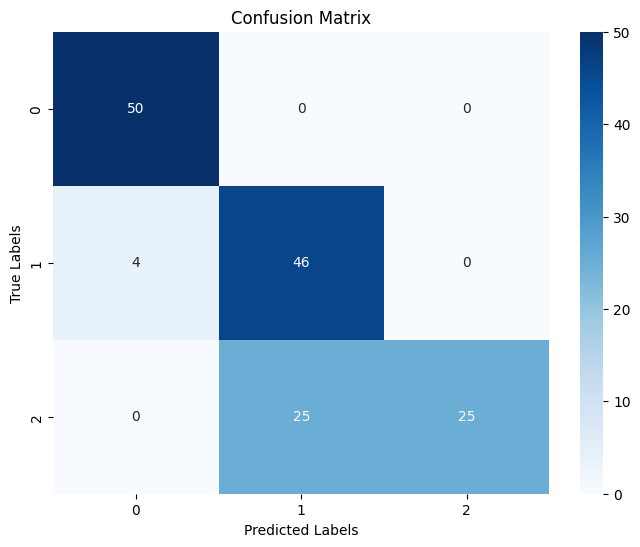

In [113]:
plot_confusion_matrix(clusters , labels)

### Accuracy Metrics

In [114]:
calculate_and_print_metrics(clusters, labels)

Precision: 0.8066666666666666
Recall: 0.8579377499565294
F1 Score: 0.7961785689058415


### Applying Entropy Based Fuzzy clustering on the dataset (using PCA with number of components = 2)

In [115]:
custom_pca = MyPCA(n_components = 2)
custom_pca.fit(data_points)
compressed_data = custom_pca.compress(data_points)
decompressed_data = custom_pca.decompress(compressed_data)

Alpha: 0.28019373499250727
Final Clusters:
Cluster 1:
+------------+------------+------------+------------+
|   Column 0 |   Column 1 |   Column 2 |   Column 3 |
+============+============+============+============+
|    4.93709 |    3.36447 |    1.42344 |  0.222619  |
+------------+------------+------------+------------+
|    5.0193  |    2.58188 |    3.11254 |  0.931626  |
+------------+------------+------------+------------+
|    4.92409 |    2.37778 |    3.32994 |  1.02331   |
+------------+------------+------------+------------+
|    5.4911  |    2.81427 |    3.56006 |  1.11764   |
+------------+------------+------------+------------+
|    4.91281 |    2.38692 |    3.29047 |  1.00678   |
+------------+------------+------------+------------+
|    5.30473 |    3.69534 |    1.47896 |  0.244439  |
+------------+------------+------------+------------+
|    4.66752 |    3.13089 |    1.36504 |  0.19919   |
+------------+------------+------------+------------+
|    5.25685 |    3.6397  | 

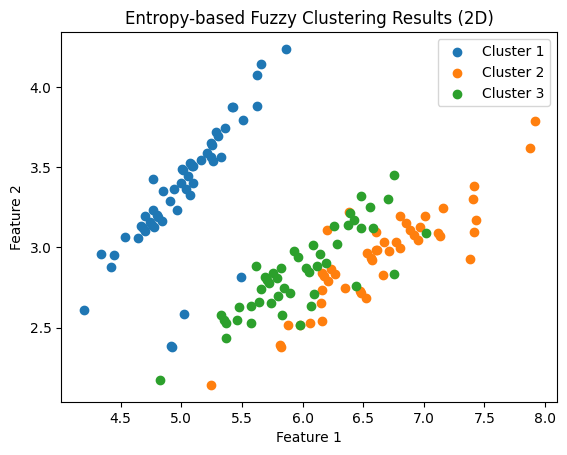

In [116]:
# Parameters for entropy-based fuzzy clustering
beta = 0.5
gamma = 0.2

entropy_fuzzy = EntropyBasedFuzzyClustering(decompressed_data, beta, gamma)
clusters, outliers = entropy_fuzzy.clustering_algorithm()

# Print clusters and outliers in a tabular format
print_clusters(clusters , outliers)

# Plotting clusters and outliers in 2D
plot_clusters(clusters, outliers, '2D')

### Confusion Matrix (Between the predicted clusters and the true labels)

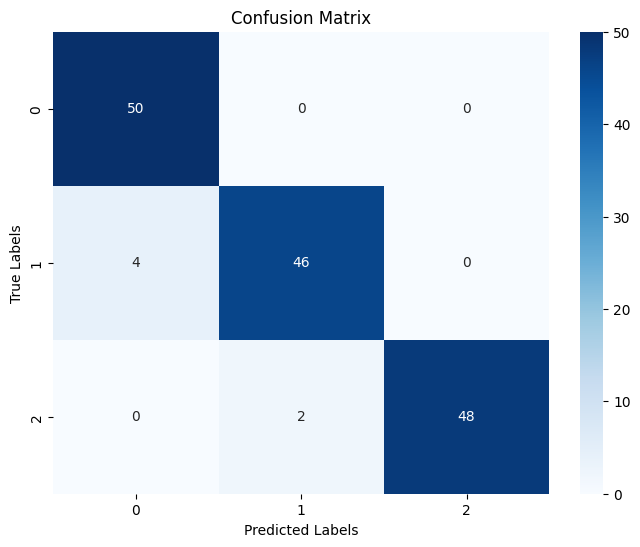

In [117]:
plot_confusion_matrix(clusters , labels)

### Accuracy Metrics

In [118]:
calculate_and_print_metrics(clusters, labels)

Precision: 0.96
Recall: 0.9614197530864198
F1 Score: 0.9599686028257457


In [119]:
len(clusters)

3

### Applying Entropy Based Fuzzy clustering on the dataset (using PCA with number of components = 3)

In [120]:
custom_pca = MyPCA(n_components = 3)
custom_pca.fit(data_points)
compressed_data = custom_pca.compress(data_points)
decompressed_data = custom_pca.decompress(compressed_data)

Alpha: 0.2741779039693942
Final Clusters:
Cluster 1:
+------------+------------+------------+------------+
|   Column 0 |   Column 1 |   Column 2 |   Column 3 |
+============+============+============+============+
|    4.97032 |    3.53007 |    1.34514 |  0.229108  |
+------------+------------+------------+------------+
|    5.02664 |    2.57435 |    3.11158 |  0.924748  |
+------------+------------+------------+------------+
|    4.98561 |    2.31458 |    3.32189 |  0.965623  |
+------------+------------+------------+------------+
|    4.90565 |    2.39427 |    3.29141 |  1.0135    |
+------------+------------+------------+------------+
|    4.98907 |    3.31108 |    1.41663 |  0.173879  |
+------------+------------+------------+------------+
|    5.31469 |    3.68511 |    1.47765 |  0.235097  |
+------------+------------+------------+------------+
|    4.61879 |    3.18096 |    1.37142 |  0.244891  |
+------------+------------+------------+------------+
|    5.15982 |    3.73937 |  

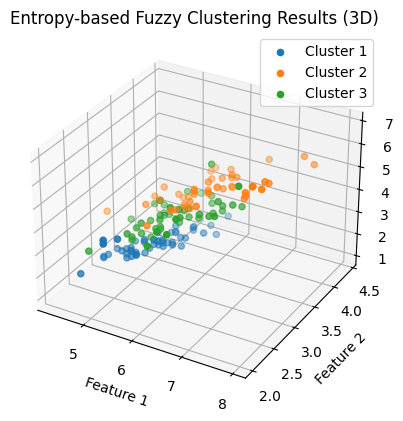

In [121]:
# Parameters for entropy-based fuzzy clustering
beta = 0.5
gamma = 0.2

entropy_fuzzy = EntropyBasedFuzzyClustering(decompressed_data, beta, gamma)
clusters, outliers = entropy_fuzzy.clustering_algorithm()

# Print clusters and outliers in a tabular format
print_clusters(clusters , outliers)

# Plotting clusters and outliers in 3D
plot_clusters(clusters, outliers, '3D')

### Confusion Matrix (Between the predicted clusters and the true labels)

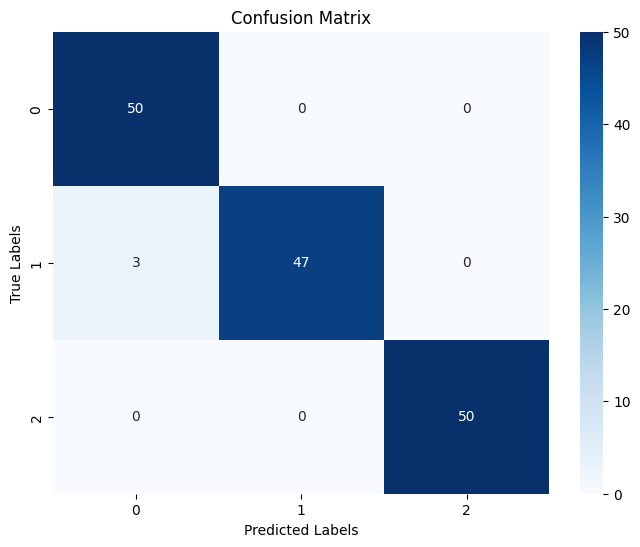

In [122]:
plot_confusion_matrix(clusters , labels)

### Accuracy Metrics

In [123]:
calculate_and_print_metrics(clusters, labels)

Precision: 0.98
Recall: 0.9811320754716982
F1 Score: 0.9799819837854069


### To compare the results of the three methods involving Entropy Based Fuzzy Clustering on the Iris dataset, let's interpret and analyze the outcomes:

### Method 1: Entropy Based Fuzzy Clustering (without PCA)
- **Class 0:** Correctly classified all 50 samples.
- **Class 1:** 46 out of 50 correct, resulting in 4 misclassified samples.
- **Class 2:** 25 out of 50 correct, resulting in 25 misclassified samples.
- Parameters: `beta = 0.5`, `gamma = 0`
- Accuracy metrics: 
    - `Precision`: 0.8066666666666666
    - `Recall`: 0.8579377499565294
    - `F1 Score`: 0.7961785689058415


### Method 2: Entropy Based Fuzzy Clustering (using PCA with 2 components)
- **Class 0:** Correctly classified all 50 samples.
- **Class 1:** 46 out of 50 correct, resulting in 4 misclassified samples.
- **Class 2:** 48 out of 50 correct, resulting in 2 misclassified samples.
- Parameters: `beta = 0.5`, `gamma = 0.2`
- Accuracy metrics: 
    - `Precision`: 0.96
    - `Recall`: 0.9614197530864198
    - `F1 Score`: 0.9599686028257457

### Method 3: Entropy Based Fuzzy Clustering (using PCA with 3 components)
- **Class 0:** Correctly classified all 50 samples.
- **Class 1:** 47 out of 50 correct, resulting in 3 misclassified samples.
- **Class 2:** Correctly classified all 50 samples.
- Parameters: `beta = 0.5`, `gamma = 0.2`
- Accuracy metrics: 
    - `Precision`: 0.98
    - `Recall`: 0.9811320754716982
    - `F1 Score`: 0.9799819837854069

#### Observations and Analysis:
1. **Method 1:** Without using PCA, this method resulted in higher misclassification, especially for Class 2.
2. **Method 2:** Utilizing PCA with 2 components improved the results, reducing misclassifications for Class 2.
3. **Method 3:** Employing PCA with 3 components showed slight improvements in performance.

#### **Key findings:**
1.	Class 0 was accurately classified by all methods.

2.	Without PCA, classification accuracy was lower than with PCA especially for Class 2.

3.	PCA, especially with 3 components, improved overall accuracy.

4.	Method 1 is eliminated, and now we compare PCA effectiveness between methods 2 and 3.


### Comparison of Entropy Based Fuzzy Clustering with PCA (2 components) and PCA (3 components):

#### Entropy Based Fuzzy Clustering with PCA (2 components):
- Achieved improved results compared to clustering without PCA.
- **Shows reasonably close performance to PCA (3 components) but with simpler dimensionality (lower number of components).**

#### Entropy Based Fuzzy Clustering with PCA (3 components):
- Showed slight improvements over PCA (2 components) in the classification of one of the classes but didn't have a significant impact overall.
- **Offers a slightly more detailed representation of the data due to the inclusion of an additional component.**

### Discussion of Findings:
- **Entropy Based Fuzzy Clustering without PCA:** Considered the least effective method among the three approaches, resulting in higher misclassifications across classes.

- **Entropy Based Fuzzy Clustering with PCA (2 components):** Demonstrated notably improved performance compared to clustering without PCA, **providing a good balance between simplicity (lower dimensionality) and classification accuracy.**

- **Entropy Based Fuzzy Clustering with PCA (3 components):** Displayed slight enhancements over PCA (2 components) in certain class classifications **but didn't substantially outperform the 2-component PCA approach.**

### Decision:
Given the marginal difference in performance between PCA (2 components) and PCA (3 components) in terms of classification accuracy and the simplicity offered by 2 components, choosing PCA with 2 components for Entropy Based Fuzzy Clustering appears optimal. It strikes a balance between reducing dimensionality and achieving a reasonably good classification performance.

The decision may vary based on specific application needs, computational complexity, and the significance of the slight performance improvement provided by 3 components. However, considering a trade-off between complexity and performance, PCA with 2 components seems to be a practical and effective choice for the clustering analysis.